# How Does Vaccination Decrease the Susceptible and Deceased Population of Ebola?

Maya Al-Ahmad & Julia Benton

## Question

For our project, we researched the dynamics of a population that experiences an Ebola outbreak and the effectiveness of the experimental Ebola vaccine VSV-ZEBOV to predict an answer to the question "How Does Vaccination Reduce the Susceptible and Deceased Population of Ebola?"

Our question is impactful because it shows that if a vaccination were given to a population at the start of an outbreak of Ebola, the percent of the population who would be susceptible and deceased reduces proportional to the percent of the population that is vaccinated. Those in the medical field and everyday people alike would care about our model because it reveals more about the population dynamics of infectious diseases. The Ebola vaccine VSV-ZEBOV has been developed, proven to be safe and induce an immune response, and found to be 100% effective in trials so far. However, the vaccine is not yet licensed by any health authority and is not used to treat Ebola outbreaks (there is an exception- the vaccine can be used when the medical community deems it unethical to not use it in a certain location where there is an outbreak happening). Our model reveals that many lives could be saved with the vaccine and how vital it is that the vaccination is distributed to treat affected communities for current and future outbreaks of this deadly disease.

We adapted our equations from the University of Washington's "Modeling the Spread of Ebola" (https://sites.math.washington.edu/~morrow/mcm/mcm15/38725paper.pdf), which was based on data from the 2014 Ebola outbreak in Liberia, Sierra Leone, and Guinea. We create an SIRD model, in which S is the susceptible population, I is the infected population, R is the recovered population, and D is the deceased population. Our equations calculate the change in each stock each and update each at our precise time step of 1 day. We used Euler's method so we could evaluate the derivatives at discrete time steps, assuming they are constant in between. We used beta to represent the contact rate, gamma to represent the recovery rate, and mu to represent the death rate.

In [23]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline 

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# Model

### Make System
Our make system function creates a system that contains our start and end times of 0 day and 150 days, respectively. We give initial values to the susceptible, infected, recovering, and deceased population. This is a weak point of model and is discussed in-depth later on, but it is important to note that our starting SIRD values are not based on data and were purely selected to make the model work correctly. We define dt to be 1 day, which is our discrete time step to be used in Euler's method in our update function

In [2]:
def make_system(beta, gamma, mu): 
    #beta-contact rate, gamma-recovery rate, mu-death rate
    init = State(S=1000, I= 500, R=0, D= 0)
    #S=Susceptible, I=Infected, R=Recovered, D=Deceased
    init /= np.sum(init) 

    t0 = 0 #start time is 0 days
    t_end = 150 #end time is 150 days
    dt = 1 #discrete time step defined for Euler's method in update_func
    
    return System(init=init, t0=t0, t_end=t_end,
                 beta = beta, gamma = gamma, mu = mu, dt = dt)

### Update Function
Our update function changes the S, I, R, and D values using our equations. We update our stocks using the contact rate,  recovery rate, and death rate. We evaluate these changes at the discrete time step of dt=1 using Euler's method to make our results most accurate and precise. We made our code easier to read by using the unpack function, which allows us to use beta, gamma, mu, and dt without the dot operator. 

In [24]:
def update_func(state, t, system):
    """Update the SIRD model.
    
    state: State with variables S, I, R, D
    dt: discrete time step
    system: System with beta, gamma, mu
    
    returns: State object
    """
    unpack(system) #can use beta, gamma, mu, and dt without dot operator
    S, I, R, D = state

    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    
    S += dSdt * dt
    I += dIdt * dt
    R += dRdt * dt
    D += dDdt * dt
    
    return State(S=S, I=I, R=R, D=D)

In [25]:
def run_simulation(system, update_func):

    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [26]:
def plot_results(S, I, R, D):

    plot(S, '-', label='Susceptible')
    plot(I, '-', label='Infected')
    plot(R, '-', label='Recovered')
    plot(D, '-', label='Deceased')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population',
             title = 'SIRD Model Ebola')

In [27]:
def calc_total_infected(results): #results are from run_simulation function

    return get_first_value(results.S) - get_last_value(results.S) 
    #returns total number of ppl infected thrghout simulation

Another weak aspect of our model is present next, as our values for the contact rate, recovery rate, and death rate were not from a single consistent source due to us being unable to find one source with all the data. Our beta value came from Figure 2B in "A simple mathematical model for Ebola in Africa" on https://www.tandfonline.com/doi/pdf/10.1080/17513758.2016.1229817. Our gamma came from

Our gamma value was calculated with data from the World Health Organization (WHO) and "Systematic review of the literature on viral persistence and sexual transmission from recovered Ebola survivors: evidence and recommendations" from https://bmjopen.bmj.com/content/6/1/e008859. The WHO reports that 50% of those with Ebola recover, which was divided by data from the "Systematic review" which told us that it takes 6 months to be totally recovered.

Our mu came from the 50% survival rate reported by the WHO at http://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease. We divided this value by 12 days, since the time for symptoms to appear according to the WHO is 2 to 21 days, which averages to 12 days.

In [29]:
beta = .006  #from tandfonline.com
gamma = .002777777 #Recovery rate over 6 months is 50% (WHO)
mu = .041666666 #Death rate over 12 days is 50% (WHO)

system = make_system(beta, gamma, mu)

results = run_simulation(system, update_func)
print(beta, gamma, mu, calc_total_infected(results))

0.006 0.002777777 0.041666666 0.0320453134912686


In [32]:
def total_infected(results): #results are from run_simulation
    System.max = get_first_label 

    for t in system.init:
        if system[t]>system[System.init.max]:
            system.init.max = t
        
#print(system.init.max)

# Results

First, we plot the results of our simulation that runs without the introduction of the vaccine. The dynamics of susceptible, infected, and recovered populations as fractions of the entire population can be seen over the course of 140 days.

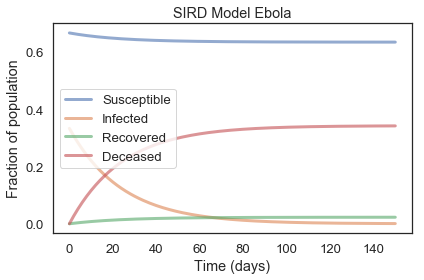

In [34]:
plot_results(results.S, results.I, results.R, results.D)

Now, we give new values for our contact rate, recovery rate, and death rate and make a new system in order to introduce vaccination to the SIRD model. We move people straight from the susceptible stock to the recovered stock because the VSV-ZEBOV vaccine has been found to be 100% effective in trials according to https://www.healio.com/infectious-disease/emerging-diseases/news/online/%7B37a06988-6fbf-455d-8683-6f3971346591%7D/ebola-vaccine-was-100-effective-in-major-trial.

In [44]:
def add_immunization(system, fraction): #models vaccine by moving from S to R

    system.init.S -= fraction
    system.init.R += fraction

In [45]:
tc = 166.66      # time between contacts in days 
tr = 360         # recovery time in days
td = 24          # time to die in days

beta = 1 / tc      # new contact rate in per day
gamma = 1 / tr     # new recovery rate in per day
mu = 1/ td
system = make_system(beta, gamma, mu)

,values
init,S 0.666667 I 0.333333 R 0.000000 D ...
t0,0
t_end,150
beta,0.00600024
gamma,0.00277778
mu,0.0416667
dt,1


In [46]:
results = run_simulation(system, update_func)
calc_total_infected(results)

0.0320466794636709

In [47]:
system2 = make_system(beta, gamma,mu)
add_immunization(system2, 0.1)
results2 = run_simulation(system2, update_func)
calc_total_infected(results2)

0.026866245376136577

Next, we plot our results with 10%, 30%, and 50% of the population immunized. These percentages were chosen to demonstrate that the percent of population that is deceased will decrease as the percent of the population immunized increases. Our graphs show that less people die when more are vaccinated, which is the result we expected to see.

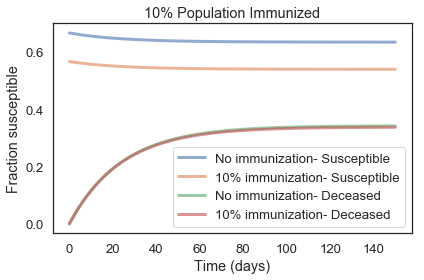

In [39]:
plot(results.S, '-', label='No immunization- Susceptible')
plot(results2.S, '-', label='10% immunization- Susceptible')
plot(results.D, '-', label='No immunization- Deceased')
plot(results2.D,'-', label= '10% immunization- Deceased')

decorate(xlabel='Time (days)',
         ylabel='Fraction susceptible',
         title='10% Population Immunized')


In [40]:
system3 = make_system(beta, gamma,mu)
add_immunization(system3, 0.3)
results3 = run_simulation(system3, update_func)
calc_total_infected(results3)

0.016919158287690972

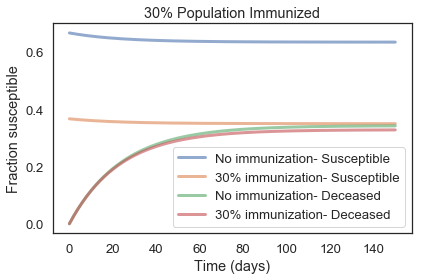

In [41]:
plot(results.S, '-', label='No immunization- Susceptible')
plot(results3.S, '-', label='30% immunization- Susceptible')
plot(results.D, '-', label='No immunization- Deceased')
plot(results3.D,'-', label= '30% immunization- Deceased')

decorate(xlabel='Time (days)',
         ylabel='Fraction susceptible',
         title='30% Population Immunized')

In [42]:
system4 = make_system(beta, gamma,mu)
add_immunization(system4, 0.5)
results4 = run_simulation(system4, update_func)
calc_total_infected(results4)

0.007489715760721438

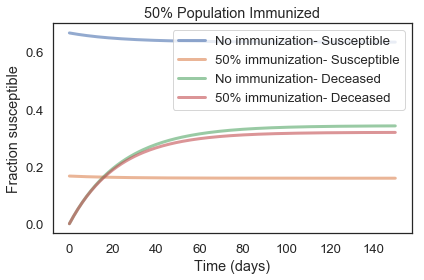

In [43]:
plot(results.S, '-', label='No immunization- Susceptible')
plot(results4.S, '-', label='50% immunization- Susceptible')
plot(results.D, '-', label='No immunization- Deceased')
plot(results4.D,'-', label= '50% immunization- Deceased')

decorate(xlabel='Time (days)',
         ylabel='Fraction susceptible',
         title='50% Population Immunized')

In our next two graphs, we plot all the susceptible populations and all the deceased populations with each percentage of immunization on their own graphs to make it very clear that introducing more immunization leads to fewer susceptible and deceased individuals of a population.

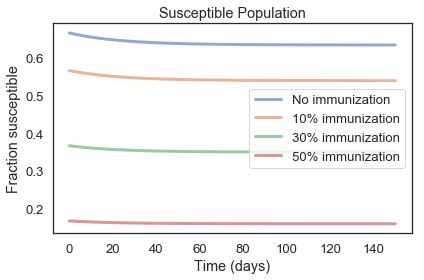

In [48]:
plot(results.S, '-', label='No immunization')
plot(results2.S, '-', label='10% immunization')
plot(results3.S, '-', label='30% immunization')
plot(results4.S,'-', label= '50% immunization')

decorate(xlabel='Time (days)',
         ylabel='Fraction susceptible',
         title='Susceptible Population')

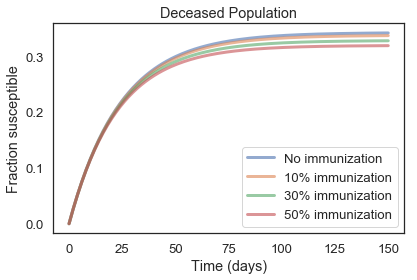

In [49]:
plot(results.D, '-', label='No immunization')
plot(results2.D, '-', label='10% immunization')
plot(results3.D, '-', label='30% immunization')
plot(results4.D,'-', label= '50% immunization')

decorate(xlabel='Time (days)',
         ylabel='Fraction susceptible',
         title='Deceased Population')

# Interpretation

We found an answer to our question of "How Does Vaccination Decrease the Susceptible and Deceased Population of Ebola?" 
The rVSV-ZEBOV vaccine reduces the fraction of the population in which there is an Ebola outbreak that is susceptible and deceased a proportional amount to the percent of the population vaccinated. 

One failure of our model is our starting SIRD values, since they are not based on data and were purely selected by us to make the make the model work correctly. The biggest inaccuracy of our model is because we had great difficulty finding useable data from a single source, leading us to draw from several sources and not have consistency in our numbers. We had to adjust our beta, gamma, and mu once again when immunization was introduced in order to get working graphs. Since our data did not come from a single reliable source, our results might be somewhat realistic but are not accurate. Our model is not accurate, but it is a proxy for the effectiveness of the vaccine as a prevention method.

In our process of abstraction, we had to make decisions about details that were important and not vital to our model. We did not account for the natural change in population as people naturally born and die is an extra level of complexity we chose not to include to keep our level of abstraction of the model constant.

We iterated quite a bit in creating our model. We started out trying to use real data from the 2014 outbreak to create our model, but over time realized that the SIRD model is too simplistic to work with a changing value for beta, gamma, and mu. We have since changed the model to have consistent values, and because of that, further abstracted it from reality. We could not make our model too complex since we faced issues of an SIR model behavior being pandemic, whereas Ebola is an outbreak. An Ebola outbreak in reality only affects a town or city, not on the country scale.

We were originally also going to include a quarantine stock in our model, but ended up focusing our time instead on only the vaccine and representing it to the best of our ability in our model. The VSV-ZEBOV vaccine did not come into play during the 2014 outbreak, so vaccination is the newer and less researched variable making our job of finding good data very challenging. If we were given more time, we would include quarantine in our model. In addition, we might consider representing the few people who become immune to the disease after recovery or modeling the latently infected people and how long it takes for the onset of symptoms. This would add an extra layer of complexity to the model, but might further contribute to the inaccuracy of the model as this data would be very difficult to find and would likely not come from a single reliable, comprehensive source.

# External Validation

We found external data to verify our SIRD model at https://www.tandfonline.com/doi/pdf/10.1080/17513758.2016.1229817. The graph in Figure 3A somewhat resembles our first graph, but the shape of the susceptible population line is different. We know our data is not accurate since we drew from several sources and good numbers were difficult to find, so we are not suprised that our graphs are not identical to those in "A simple mathematical model for Ebola in Africa". 

# What should our response be?

Our model shows that the rVSV-ZEBOV vaccine reduces the fraction of the population in which there is an Ebola outbreak that is susceptible and deceased a proportional amount to the percent of the population vaccinated. Although in this model, the vaccination's effects on the death rate are not especially impressive, the long term effects of such a vaccine would be significant. In this model, we start with 500 infected people. The death rate for those people is not much different. However, if a more significant percentage of the population (see graphs above) is vaccinated, then those people would be less likely to get sick in the first place, which in turn, reduces the death rate. Ebola is not likely to become the next small pox - the world at large is not affected by it enough for it to be fully eradicated. But in the areas that it affects (West Africa), if the stigma surrounding vaccines and non-traditional medicine are lifted, then the vaccine could stop future outbreaks from ever occurring at the same scale of the 2014 and 2018 outbreaks. Our model, as well as the research done by others, shows the effectiveness of this vaccine, and the relatively few risks associated with it. Now, it just needs to be used in order to save lives.